In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.get_logger().setLevel('ERROR') 

Num GPUs Available:  1


In [2]:
from tensorflow.keras import models,layers
import warnings
warnings.filterwarnings('ignore')

In [3]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 10

In [4]:
import matplotlib.pyplot as plt

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("../data/casting_data/casting_data/train",shuffle=True,image_size = (IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE)

Found 6633 files belonging to 2 classes.


In [6]:
class_name = dataset.class_names

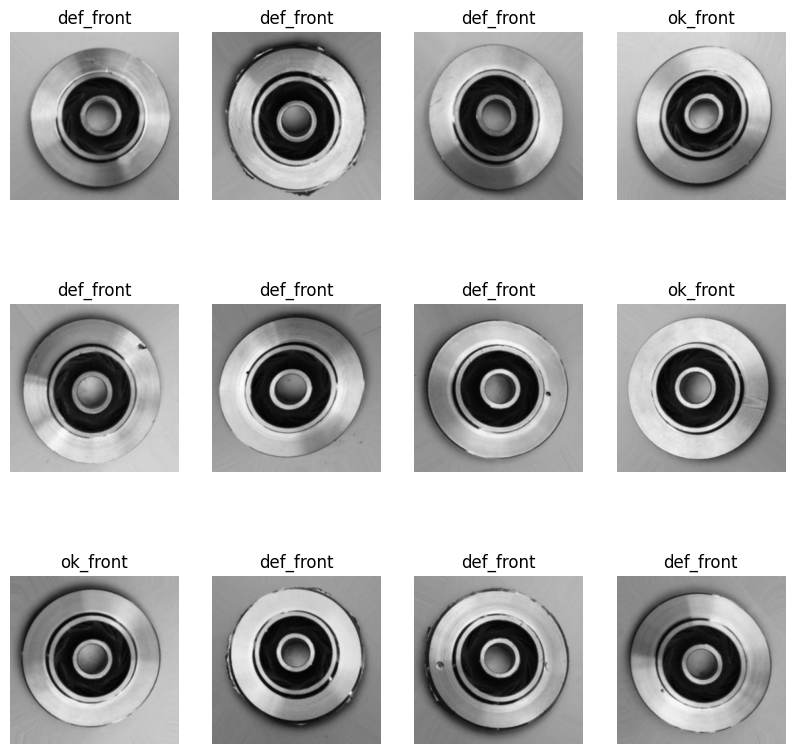

In [7]:
plt.figure(figsize=(10,10))
for img_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype('int'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In [8]:
train_dataset = dataset.take(int(len(dataset) * 0.8))
validate_dataset = dataset.skip(int(len(dataset) * 0.8))

In [9]:
train_dataset = train_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validate_dataset = validate_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1.0/255)
])  

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [12]:
input_shape = (IMG_SIZE, IMG_SIZE, CHANNEL)  # 1 channel for black-and-white images
n_classes = len(class_name)

model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, CHANNEL)),  # Grayscale images have 1 channel
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validate_dataset,
    epochs=10
)

Epoch 1/10
166/166 [==============================] - 89s 420ms/step - loss: 0.6875 - accuracy: 0.5565 - val_loss: 0.6826 - val_accuracy: 0.5844
Epoch 2/10
166/166 [==============================] - 72s 416ms/step - loss: 0.6620 - accuracy: 0.5943 - val_loss: 0.5271 - val_accuracy: 0.6949
Epoch 3/10
166/166 [==============================] - 71s 415ms/step - loss: 0.4501 - accuracy: 0.7745 - val_loss: 0.2541 - val_accuracy: 0.9023
Epoch 4/10
166/166 [==============================] - 71s 410ms/step - loss: 0.3215 - accuracy: 0.8584 - val_loss: 0.2051 - val_accuracy: 0.9235
Epoch 5/10
166/166 [==============================] - 73s 425ms/step - loss: 0.2224 - accuracy: 0.9074 - val_loss: 0.1401 - val_accuracy: 0.9493
Epoch 6/10
166/166 [==============================] - 74s 428ms/step - loss: 0.1695 - accuracy: 0.9351 - val_loss: 0.1367 - val_accuracy: 0.9500
Epoch 7/10
166/166 [==============================] - 69s 398ms/step - loss: 0.1246 - accuracy: 0.9535 - val_loss: 0.1376 - val_ac

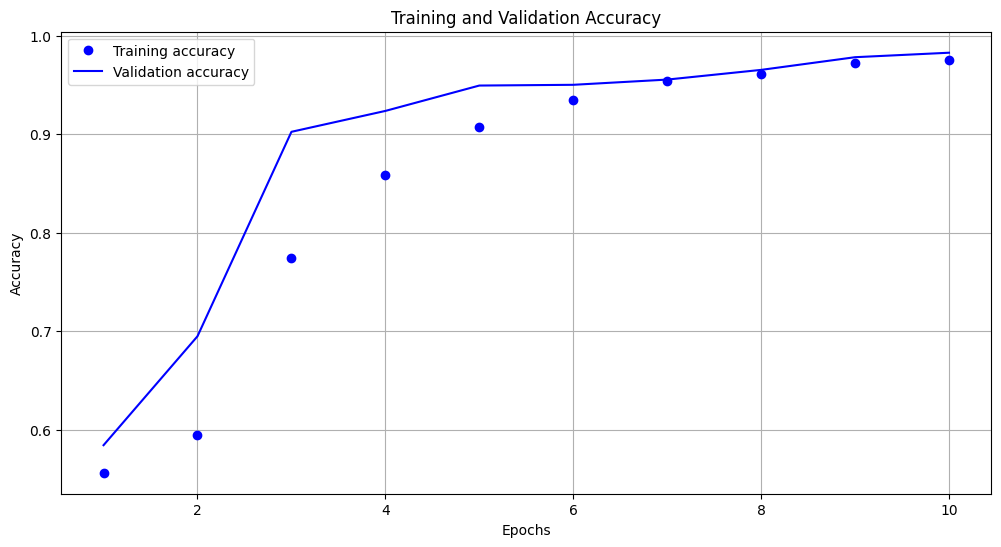

In [16]:
# Extract history data
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory("../data/casting_data/casting_data/test",shuffle=True,image_size = (IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE)

Found 715 files belonging to 2 classes.


In [18]:
test_dataset = test_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

23/23 [==============================] - 1s 39ms/step - loss: 0.0620 - accuracy: 0.9776
Test accuracy: 0.9776


In [20]:
# Save the model
model.save('model.keras')